In [1]:
# basic lib
import FinanceDataReader as fdr
import pandas_datareader.data as web
from datetime import datetime


import time
import random
import pandas as pd 
import glob
pd.options.display.max_rows=100

import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%autosave 360
from matplotlib.gridspec import GridSpec
import seaborn as sns 

sns.set_style(style="darkgrid")

import re
import platform    
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')
plt.rcParams['axes.unicode_minus'] = False
    

Autosaving every 360 seconds


In [2]:
# 차트 그리는 함수
def make_chart(symbol):
    symbol = web.DataReader(symbol, 'fred', start='2018-01-01', end='2021-06-01')
    symbol.plot()
    plt.tight_layout()
    plt.show()

## 인플레이션을 생각해 볼 수 있는 지표들 시각화
### - 일시적이냐 지속적이냐를 볼 수 있는 방법은, 인플레이션 시기에 성장이 뒷받침 되는지 확인

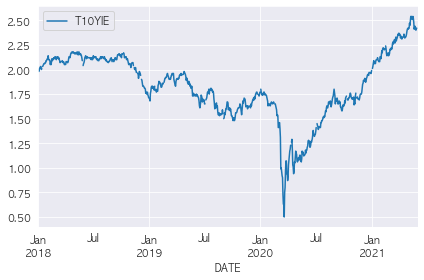

In [3]:
# 국채기반 인플레이션 rate
make_chart('T10YIE')

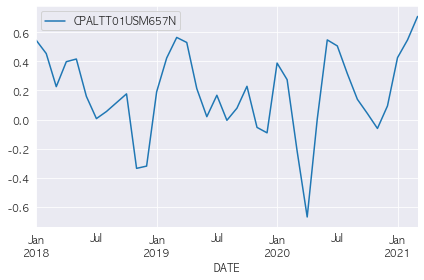

In [4]:
# 소비자 물가지수 모든 아이템
make_chart('CPALTT01USM657N')

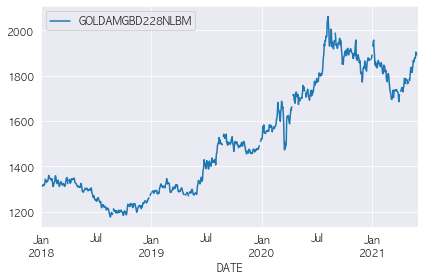

In [5]:
# 금값 변동
make_chart('GOLDAMGBD228NLBM')

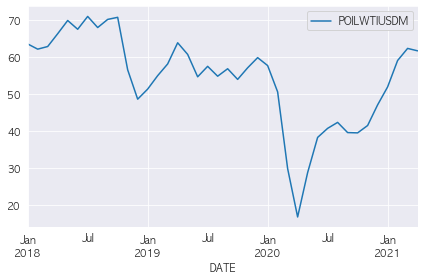

In [6]:
# 원유 값
make_chart('POILWTIUSDM')

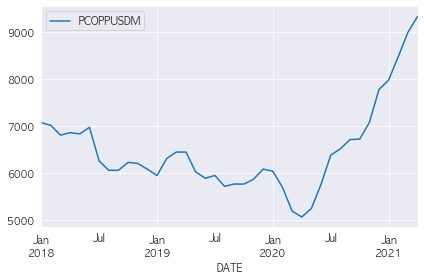

In [7]:
# 구리 값
make_chart('PCOPPUSDM')

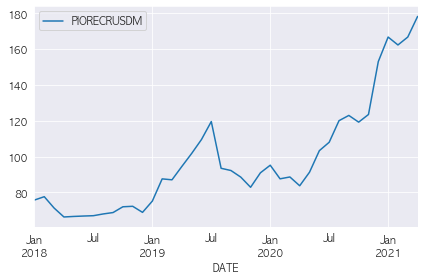

In [8]:
# 철강 값
make_chart('PIORECRUSDM')

## 성장을 확인 해볼 수 있는 지표들

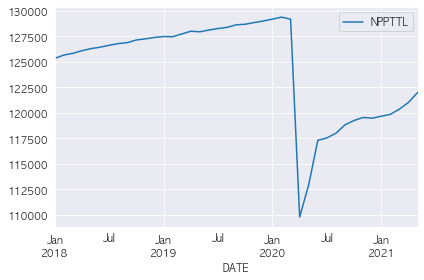

In [9]:
# 미국 농업을 제외한 고용지표
make_chart('NPPTTL')

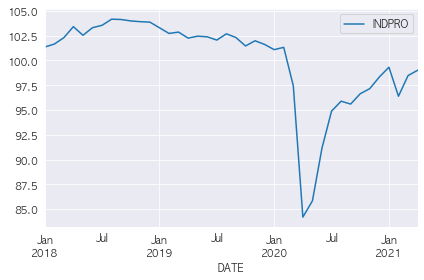

In [10]:
# Production 지수
make_chart('INDPRO')

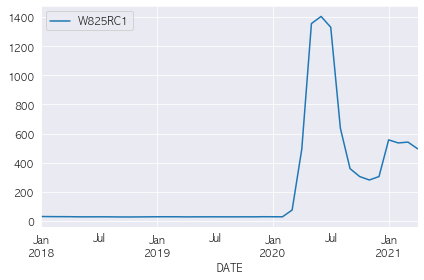

In [11]:
# 실업수당, 부양책
make_chart('W825RC1')

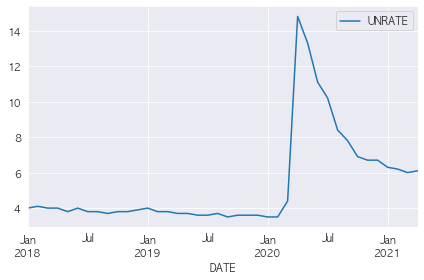

In [12]:
# 실업률
make_chart('UNRATE')

## 데이터프레임으로 가져오기

In [30]:
# csv파일 한번에 가져오기
path = '/Users/tk/Documents/inflation' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=1)
df = frame.drop('DATE', axis=1)
data = df.set_index('monthly')
data = data.rename(columns={'CPALTT01USM657N':'CPI', 'NPPTTL':'Employment', 'GOLDAMGBD228NLBM':'Gold',
             'INDPRO':'Production', 'UNRATE':'Unemployment', 'W825RC1':'Unemployment_benefit', 'PIORECRUSDM':'Iron',
             'PCOPPUSDM':'Copper', 'POILWTIUSDM': 'WTI_Crude'})
data = data.dropna()
data

,CPI,Employment,Gold,Production,Unemployment,Unemployment_benefit,Iron,Copper,WTI_Crude
monthly,,,,,,,,,
1/1/18,0.544775,125346.437,1332.8100,101.3561,4.0,29.8,75.782609,7065.852273,63.556957
2/1/18,0.453469,125674.267,1333.7750,101.6495,4.1,29.1,77.650000,7006.525000,62.150000
3/1/18,0.226113,125841.000,1326.5600,102.2980,4.0,28.8,71.318182,6799.178571,62.861364
4/1/18,0.397509,126102.265,1334.3700,103.4095,4.0,28.5,66.333333,6851.512500,66.320476
5/1/18,0.415892,126306.269,1303.6119,102.5408,3.8,27.6,66.630435,6825.273810,69.892609
6/1/18,0.159388,126443.638,1282.1200,103.3045,4.0,27.6,66.857143,6965.857143,67.522857
7/2/18,0.006746,126634.615,1238.0600,103.5474,3.8,27.8,67.045455,6250.750000,70.991364
8/1/18,0.055554,126794.662,1201.8600,104.1659,3.8,27.5,68.021739,6051.045455,67.988696
9/1/18,0.116203,126893.385,1199.2000,104.1315,3.7,26.9,68.800000,6050.762500,70.185500


In [14]:
# return을 확인
returns = data.pct_change()
returns

,CPI,Employment,Gold,Production,Unemployment,Unemployment_benefit,Iron,Copper,WTI_Crude
monthly,,,,,,,,,
1/1/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/18,-0.167602,0.002615,0.000724,0.002895,0.025000,-0.023490,0.024641,-0.008396,-0.022137
3/1/18,-0.501371,0.001327,-0.005409,0.006380,-0.024390,-0.010309,-0.081543,-0.029593,0.011446
4/1/18,0.758014,0.002076,0.005887,0.010865,0.000000,-0.010417,-0.069896,0.007697,0.055028
5/1/18,0.046244,0.001618,-0.023051,-0.008401,-0.050000,-0.031579,0.004479,-0.003830,0.053862
6/1/18,-0.616757,0.001088,-0.016486,0.007448,0.052632,0.000000,0.003402,0.020597,-0.033906
7/2/18,-0.957673,0.001510,-0.034365,0.002351,-0.050000,0.007246,0.002817,-0.102659,0.051368
8/1/18,7.234739,0.001264,-0.029239,0.005973,0.000000,-0.010791,0.014562,-0.031949,-0.042296
9/1/18,1.091695,0.000779,-0.002213,-0.000330,-0.026316,-0.021818,0.011441,-0.000047,0.032311


In [15]:
cum_returns = (1+ returns).cumprod()-1
cum_returns

,CPI,Employment,Gold,Production,Unemployment,Unemployment_benefit,Iron,Copper,WTI_Crude
monthly,,,,,,,,,
1/1/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/18,-0.167602,0.002615,0.000724,0.002895,2.500000e-02,-0.023490,0.024641,-0.008396,-0.022137
3/1/18,-0.584943,0.003946,-0.004689,0.009293,0.000000e+00,-0.033557,-0.058911,-0.037741,-0.010944
4/1/18,-0.270324,0.006030,0.001170,0.020259,0.000000e+00,-0.043624,-0.124689,-0.030335,0.043481
5/1/18,-0.236580,0.007657,-0.021907,0.011688,-5.000000e-02,-0.073826,-0.120769,-0.034048,0.099685
6/1/18,-0.707425,0.008753,-0.038032,0.019223,-1.110223e-16,-0.073826,-0.117777,-0.014152,0.062399
7/2/18,-0.987616,0.010277,-0.071090,0.021620,-5.000000e-02,-0.067114,-0.115292,-0.115358,0.116972
8/1/18,-0.898023,0.011554,-0.098251,0.027722,-5.000000e-02,-0.077181,-0.102410,-0.143621,0.069729
9/1/18,-0.786696,0.012341,-0.100247,0.027383,-7.500000e-02,-0.097315,-0.092140,-0.143661,0.104293


In [27]:
log_returns = np.log(1+returns)
log_returns

,CPI,Employment,Gold,Production,Unemployment,Unemployment_benefit,Iron,Copper,WTI_Crude
monthly,,,,,,,,,
1/1/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/18,-0.183445,0.002612,0.000724,0.002891,0.024693,-0.023770,0.024343,-0.008432,-0.022386
3/1/18,-0.695894,0.001326,-0.005424,0.006360,-0.024693,-0.010363,-0.085060,-0.030040,0.011381
4/1/18,0.564185,0.002074,0.005870,0.010807,0.000000,-0.010471,-0.072459,0.007668,0.053567
5/1/18,0.045207,0.001616,-0.023320,-0.008436,-0.051293,-0.032088,0.004469,-0.003837,0.052461
6/1/18,-0.959086,0.001087,-0.016624,0.007420,0.051293,0.000000,0.003397,0.020388,-0.034494
7/2/18,-3.162341,0.001509,-0.034969,0.002349,-0.051293,0.007220,0.002813,-0.108319,0.050092
8/1/18,2.108362,0.001263,-0.029675,0.005955,0.000000,-0.010850,0.014457,-0.032470,-0.043217
9/1/18,0.737975,0.000778,-0.002216,-0.000330,-0.026668,-0.022060,0.011376,-0.000047,0.031800


<AxesSubplot:xlabel='monthly', ylabel='CPI'>

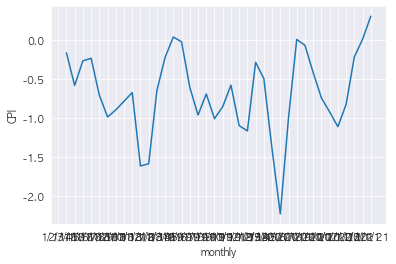

In [16]:
sns.lineplot(x=cum_returns.index, y=cum_returns['CPI'])

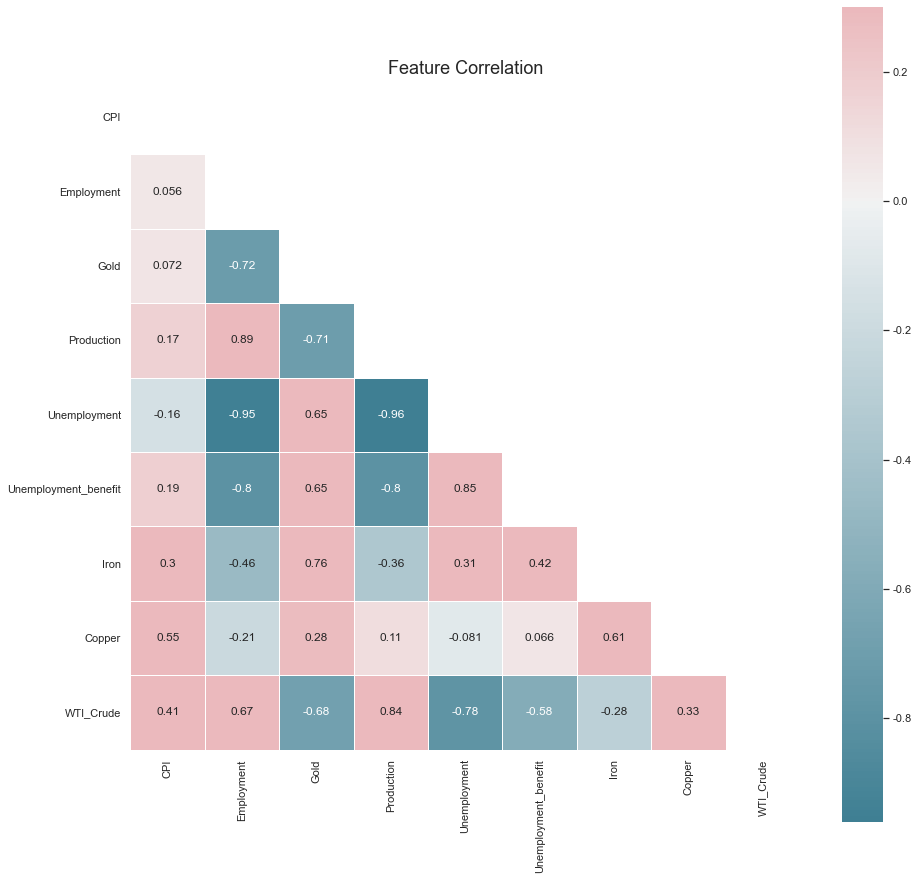

In [18]:
# 피쳐 설정을 위해 상관관계 확인
sns.set(style='white')
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Feature Correlation', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

In [19]:
# 인플레이션에 해당하는 컬럼 추출
inflation = data.drop(['Employment','Production','Unemployment','Unemployment_benefit'], axis=1)
inflation

,CPI,Gold,Iron,Copper,WTI_Crude
monthly,,,,,
1/1/18,0.544775,1332.8100,75.782609,7065.852273,63.556957
2/1/18,0.453469,1333.7750,77.650000,7006.525000,62.150000
3/1/18,0.226113,1326.5600,71.318182,6799.178571,62.861364
4/1/18,0.397509,1334.3700,66.333333,6851.512500,66.320476
5/1/18,0.415892,1303.6119,66.630435,6825.273810,69.892609
6/1/18,0.159388,1282.1200,66.857143,6965.857143,67.522857
7/2/18,0.006746,1238.0600,67.045455,6250.750000,70.991364
8/1/18,0.055554,1201.8600,68.021739,6051.045455,67.988696
9/1/18,0.116203,1199.2000,68.800000,6050.762500,70.185500


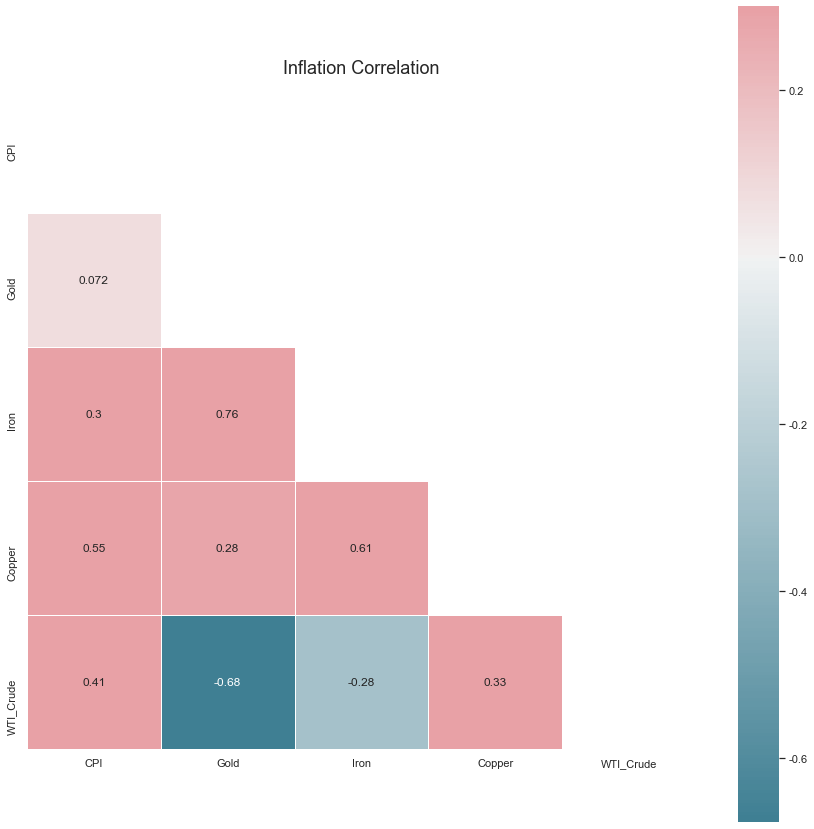

In [20]:
# inflation 상관관계 확인
sns.set(style='white')
corr = inflation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Inflation Correlation', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

In [21]:
# 성장에 해당하는 컬럼 추출
growth = data.drop(['CPI', 'Gold', 'Iron', 'Copper','WTI_Crude'], axis=1)
growth

,Employment,Production,Unemployment,Unemployment_benefit
monthly,,,,
1/1/18,125346.437,101.3561,4.0,29.8
2/1/18,125674.267,101.6495,4.1,29.1
3/1/18,125841.000,102.2980,4.0,28.8
4/1/18,126102.265,103.4095,4.0,28.5
5/1/18,126306.269,102.5408,3.8,27.6
6/1/18,126443.638,103.3045,4.0,27.6
7/2/18,126634.615,103.5474,3.8,27.8
8/1/18,126794.662,104.1659,3.8,27.5
9/1/18,126893.385,104.1315,3.7,26.9


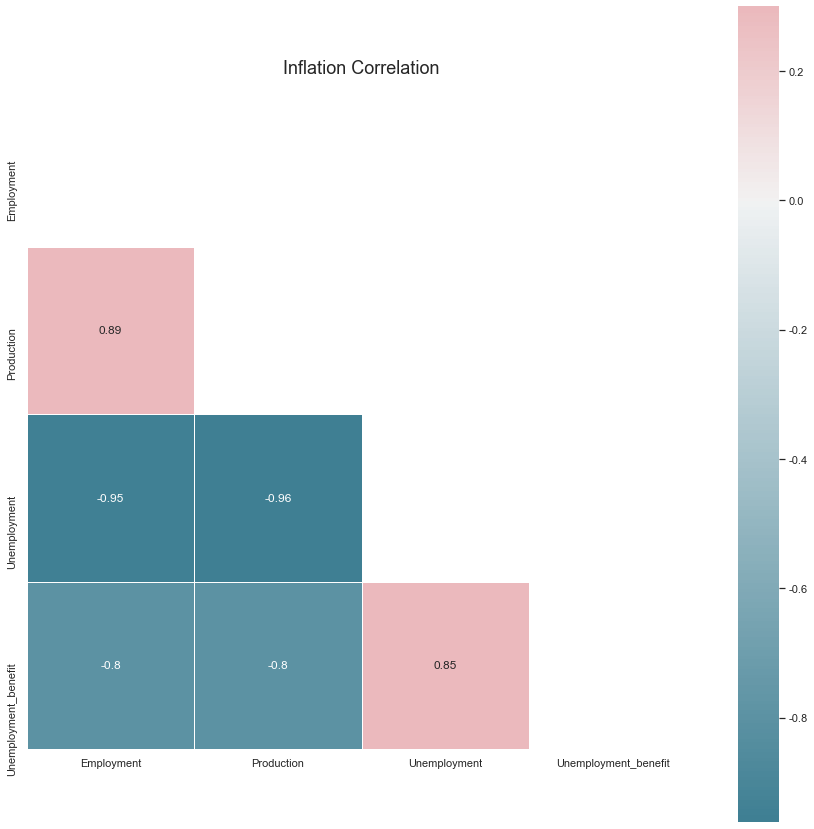

In [22]:
# Growth 상관관계 확인
sns.set(style='white')
corr = growth.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Inflation Correlation', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()